# Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
sta=pd.read_csv("D:/Datasets/50_Startups.csv")
sta.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
sta.tail(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
40,28754.33,118546.05,172795.67,California,78239.91
41,27892.92,84710.77,164470.71,Florida,77798.83
42,23640.93,96189.63,148001.11,California,71498.49
43,15505.73,127382.30,35534.17,New York,69758.98
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [4]:
print(sta.shape)
print(sta.isnull().sum())

(50, 5)
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [5]:
sta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
sta.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


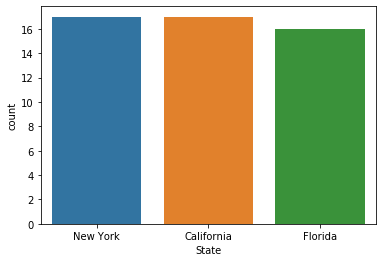

In [15]:
sns.countplot(sta['State'])

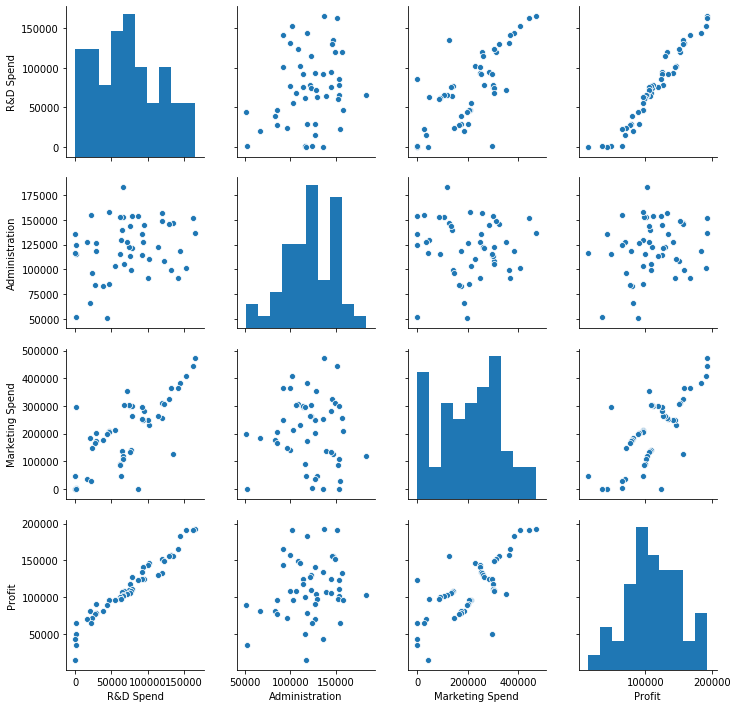

In [16]:
sns.pairplot(sta)

In [7]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
encoder=OneHotEncoder(handle_unknown='ignore')
sta_encoded=pd.DataFrame(encoder.fit_transform(sta[["State"]]).toarray())
sta_encoded.columns=encoder.get_feature_names(['State'])

In [8]:
sta_encoded

,State_California,State_Florida,State_New York
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
5,0.0,0.0,1.0
6,1.0,0.0,0.0
7,0.0,1.0,0.0
8,0.0,0.0,1.0
9,1.0,0.0,0.0


In [9]:
sta.drop(['State'],axis=1,inplace=True)

In [10]:
sta

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [12]:
final_sta= pd.concat([sta, sta_encoded ], axis=1)

In [17]:
final_sta.head(5)

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0


In [23]:
final_sta=final_sta.rename(columns={"R&D Spend":"RnD","Administration":"Administration","Marketing Spend":"Marketing",
                                    "Profit":"Profit","State_New York":"State_NewYork"})

In [28]:
import statsmodels.formula.api as smf
M1=smf.ols("Profit~RnD+Administration+Marketing+State_California+State_Florida+State_NewYork",data=(final_sta)).fit()
M1.params
print(M1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 08 May 2022   Prob (F-statistic):           1.34e-27
Time:                        10:40:55   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636  

#Since Administration,Marketing are having P>0.05 this model cannot be consider

#Prepare model only for administration and Marketing.

In [31]:
M_as=smf.ols("Profit~Administration+Marketing",data=final_sta).fit()
M_as.params
M_as.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sun, 08 May 2022   Prob (F-statistic):           2.50e-10
Time:                        13:13:57   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration     0.3237      0.131      2.468      0.017       0.060       0.588
Marketing          0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#here we can see that pvalue > 0.05 only for administration.
now prepare model for separate variables 

In [33]:
M_admin=smf.ols("Profit~Administration",data=final_sta).fit()
M_admin.params
M_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 08 May 2022   Prob (F-statistic):              0.162
Time:                        13:16:51   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#here administration is showing with higher pvalue

In [34]:
M_markt=smf.ols("Profit~Marketing",data=final_sta).fit()
M_markt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 08 May 2022   Prob (F-statistic):           4.38e-10
Time:                        13:18:43   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Marketing is showing with lower pvalue #since in both the above admin is showing to be insignificant
Before droping the varaiable admin ,check for any influential values are present

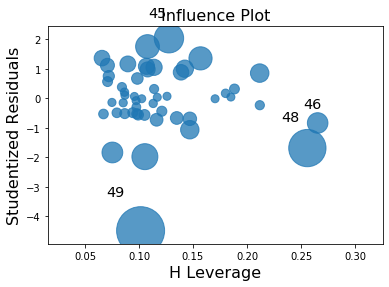

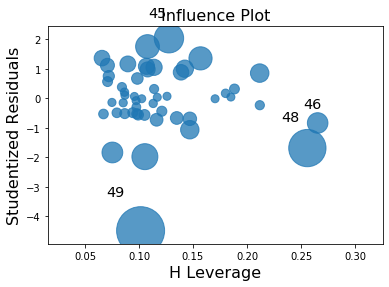

In [35]:
import statsmodels.api as sm
sm.graphics.influence_plot(M1)

In [38]:
start = final_sta.drop(final_sta.index[[49,48]],axis=0)#droping the row 

In [40]:
#Recheckin the model
M2=smf.ols("Profit~RnD+Administration+Marketing+State_California+State_Florida+State_NewYork",data=(start)).fit()
M2.params
print(M2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     217.6
Date:                Sun, 08 May 2022   Prob (F-statistic):           7.02e-29
Time:                        13:27:14   Log-Likelihood:                -493.23
No. Observations:                  48   AIC:                             998.5
Df Residuals:                      42   BIC:                             1010.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.409e+04   4569.825  

# since the admin is administration is showing more p value hence droping the administration

In [42]:
M3=smf.ols("Profit~RnD+Marketing+State_California+State_Florida+State_NewYork",data=(start)).fit()
M3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     265.9
Date:                Sun, 08 May 2022   Prob (F-statistic):           1.02e-29
Time:                        13:30:23   Log-Likelihood:                -494.30
No. Observations:                  48   AIC:                             998.6
Df Residuals:                      43   BIC:                             1008.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          3.83e+04   1841.077     20.803      0.000    3.46e+04     4.2e+04
RnD                  0.7692      0.035     22.072      0.000       0.699       0.840
Marketing            0.0251      0.013      1.908      0.063      -0.001       0.052
State_California  1.353e+04   1599.496      8.461      0.000    1.03e+04    1.68e+04
State_Florida     1.216e+04   1761.727      6.904      0.000    8609.549    1.57e+04
State_NewYork      1.26e+04   1685.592      7.478      0.000    9204.975     1.6e+04
==============================================================================
Omnibus:                        0.133   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.304
Skew:                           0.097   Prob(JB):                        0.859
Kurtosis:                       2.661   Cond. No.                     1.28e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  2e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
M3.

In [46]:
#Now to calculate the vif values of indipendent variable
rsqRnD=smf.ols("RnD~Administration+Marketing+State_California+State_Florida+State_NewYork",data=start).fit().rsquared
rsqRnD
vif_RnD = 1/(1-rsqRnD)#2.25

rsqAdmin=smf.ols("Administration~RnD+Marketing+State_California+State_Florida+State_NewYork",data=start).fit().rsquared
rsqAdmin
vif_Admin = 1/(1-rsqAdmin)#1.20

rsqMar=smf.ols("Marketing~RnD+Administration+State_California+State_Florida+State_NewYork",data=start).fit().rsquared
rsqMar
vif_Mar=1/(1-rsqMar)#2.23

d1 = {'Variables':['RnD','Administratin','Marketing'],'VIF':[vif_RnD,vif_Admin,vif_Mar]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame
#Vif values are below 10


,Variables,VIF
0,RnD,2.268965
1,Administratin,1.202930
2,Marketing,2.305283


In [48]:
M_log=smf.ols("Profit~RnD+np.log(Administration)+Marketing+State_California+State_Florida+State_NewYork",data=(start)).fit()
M_log.params
print(M_log.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     216.3
Date:                Sun, 08 May 2022   Prob (F-statistic):           7.97e-29
Time:                        13:54:41   Log-Likelihood:                -493.38
No. Observations:                  48   AIC:                             998.8
Df Residuals:                      42   BIC:                             1010.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                9.3

In [49]:
M_exp=smf.ols("np.log(Profit)~RnD+Administration+Marketing+State_California+State_Florida+State_NewYork",data=(start)).fit()
M_exp.params
print(M_exp.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(Profit)   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     103.9
Date:                Sun, 08 May 2022   Prob (F-statistic):           1.58e-22
Time:                        13:55:38   Log-Likelihood:                 46.549
No. Observations:                  48   AIC:                            -81.10
Df Residuals:                      42   BIC:                            -69.87
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.3463      0.060  

In [51]:
#Quadratic Model
start["RnD_sq"]=start.RnD*start.RnD
start["Admin_sq"]=start.Administration*start.Administration
start["Mark_sq"]=start.Marketing*start.Marketing
start["State_California_sq"]=start.State_California*start.State_California
start["State_Florida_sq"]=start.State_Florida*start.State_Florida
start["State_NewYork_sq"]=start.State_NewYork*start.State_NewYork
M_quad=smf.ols("Profit~RnD+RnD_sq+Administration+Admin_sq+Marketing+Mark_sq+State_California+State_California_sq+State_Florida+State_Florida_sq+State_NewYork+State_NewYork_sq",
           data=start).fit()
M_quad.params
M_quad.summary()#0.964,adj=0.957,aic=1003


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     130.8
Date:                Sun, 08 May 2022   Prob (F-statistic):           1.01e-25
Time:                        14:02:29   Log-Likelihood:                -492.42
No. Observations:                  48   AIC:                             1003.
Df Residuals:                      39   BIC:                             1020.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             3.56e+04   1.06e+04      3.373      0.002    1.43e+04    5.69e+04
RnD                     0.7385      0.120      6.137      0.000       0.495       0.982
RnD_sq               2.987e-07   8.11e-07      0.368      0.715   -1.34e-06    1.94e-06
Administration         -0.0068      0.290     -0.023      0.982      -0.593       0.579
Admin_sq            -2.573e-07   1.21e-06     -0.213      0.832    -2.7e-06    2.18e-06
Marketing              -0.0036      0.046     -0.079      0.937      -0.097       0.089
Mark_sq              4.791e-08   1.15e-07      0.417      0.679   -1.85e-07    2.81e-07
State_California     1.216e+04   3556.759      3.419      0.001    4967.207    1.94e+04
State_California_sq  1.216e+04   3556.759      3.419      0.001    4967.207    1.94e+04
State_Florida        1.175e+04   3732.786      3.149      0.003    4202.860    1.93e+04
State_Florida_sq     1.175e+04   3732.786      3.149      0.003    4202.860    1.93e+04
State_NewYork        1.169e+04   3541.762      3.299      0.002    4521.660    1.88e+04
State_NewYork_sq     1.169e+04   3541.762      3.299      0.002    4521.660    1.88e+04
==============================================================================
Omnibus:                        0.403   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.560
Skew:                           0.067   Prob(JB):                        0.756
Kurtosis:                       2.488   Cond. No.                     8.33e+27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.72e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [52]:
M_rp=smf.ols("Profit~RnD+np.reciprocal(Administration)+Marketing+State_California+State_Florida+State_NewYork",data=(start)).fit()
M_rp.params
print(M_rp.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     214.2
Date:                Sun, 08 May 2022   Prob (F-statistic):           9.67e-29
Time:                        14:03:57   Log-Likelihood:                -493.60
No. Observations:                  48   AIC:                             999.2
Df Residuals:                      42   BIC:                             1010.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [53]:
Mo={'Models':['Model1','LogTranform','ExpTransfrom','Quadratic','Reciprocal'],
    "R^2Values":[0.963,0.963,0.925,0.964,0.962],
    "AdjR^2values":[0.959,0.959,0.918,0.957,0.959],
     "AIC":[996.6,996.6,-83.01,1003,997.2]
    }
df=pd.DataFrame(Mo)
print(df)

         Models  R^2Values  AdjR^2values      AIC
0        Model1      0.963         0.959   996.60
1   LogTranform      0.963         0.959   996.60
2  ExpTransfrom      0.925         0.918   -83.01
3     Quadratic      0.964         0.957  1003.00
4    Reciprocal      0.962         0.959   997.20
